In [1]:
import random as rnd
import numpy as np

In [2]:
def F(x): # левая часть уравнения
    return x[0] ** 2 - 2 * x[0] + x[1] ** 2 - 2 * x[1] * x[2] + 2 * x[2] ** 2 - 4 * x[2] + x[3] ** 2 - 6 * x[3] + 14

def Fit(x): # функция приспособленности
    return 1 / (1 + F(x))

In [3]:
def cross(x, y): # операция кроссинговера
    res = []

    p = Fit(x) / (Fit(x) + Fit(y))

    for i in range(4):
        if rnd.random() < p:
            res.append(x[i])
        else:
            res.append(y[i])

    return res

In [4]:
def GA_diophant(M, K, a, b):
    x = [] # популяция
    res = []
    for _ in range(M): # формируем случайную популяцию
        x.append([ rnd.randint(a, b) for _ in range(4)])
    
    lmb = lambda i : -Fit(i)
    x.sort(key=lmb)
    res.append([x[0], F(x[0]), Fit(x[0])])
    print(f'Аргументы - {res[-1][0]}, значение функции - {res[-1][1]}, итерация - {len(res) - 1}')
    
    while res[-1][1]: # критерий окончания - найдено решение уравнения
        
        for m in range(M - K, M): # жесткая мутация
            x[m] = [ rnd.randint(a, b) for _ in range(4)]
        
        old = x[:] 
        s = sum([ Fit(l) for l in x])
        p_l = [ Fit(l) / s for l in x ] # подсчитываем вероятности выбора того или иного представителя
        
        for m in range(1, M):
            eta = np.random.choice(a = len(x), p = p_l) # имитация рулетки
            x[m] = cross(x[m], old[eta]) # скрещивание со случайной особью из предыдущей популяции
        
        x.sort(key=lmb) # сортировка по невозрастанию значений функции Fit
        res.append([x[0], F(x[0]), Fit(x[0])])
        print(f'Аргументы - {res[-1][0]}, значение функции - {res[-1][1]}, итерация - {len(res) - 1}')
    
    return res

In [16]:
show = GA_diophant(100, 20, -10, 10)

Аргументы - [2, 2, 3, -2], значение функции - 28, итерация - 0
Аргументы - [-1, 3, 2, 4], значение функции - 6, итерация - 1
Аргументы - [2, 3, 2, 4], значение функции - 3, итерация - 2
Аргументы - [2, 3, 2, 4], значение функции - 3, итерация - 3
Аргументы - [2, 3, 2, 4], значение функции - 3, итерация - 4
Аргументы - [2, 3, 2, 4], значение функции - 3, итерация - 5
Аргументы - [2, 3, 2, 4], значение функции - 3, итерация - 6
Аргументы - [2, 3, 2, 4], значение функции - 3, итерация - 7
Аргументы - [2, 3, 2, 3], значение функции - 2, итерация - 8
Аргументы - [2, 3, 2, 3], значение функции - 2, итерация - 9
Аргументы - [2, 3, 2, 3], значение функции - 2, итерация - 10
Аргументы - [2, 3, 2, 3], значение функции - 2, итерация - 11
Аргументы - [2, 3, 2, 3], значение функции - 2, итерация - 12
Аргументы - [2, 3, 2, 3], значение функции - 2, итерация - 13
Аргументы - [2, 3, 2, 3], значение функции - 2, итерация - 14
Аргументы - [2, 3, 2, 3], значение функции - 2, итерация - 15
Аргументы - [2,

In [17]:
import matplotlib.pyplot as plt
# import tikzplotlib

<ipython-input-24-bbff82acd194>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  axes[0].plot(np.array(show)[:, 1])
<ipython-input-24-bbff82acd194>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  axes[1].plot(np.array(show)[:, 2])


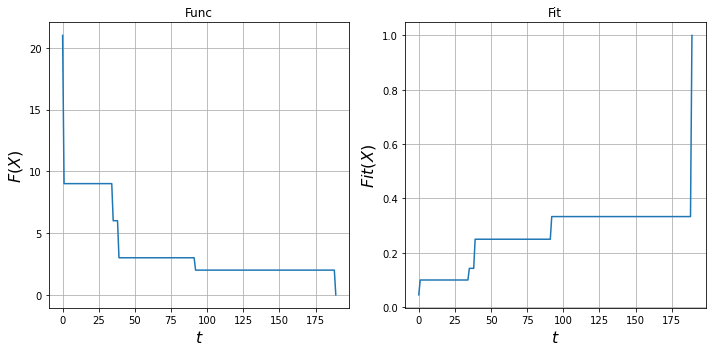

In [24]:
fig, axes = plt.subplots(1, 2, tight_layout = True, figsize=(10, 5))

axes[0].set(title='Func')
axes[1].set(title='Fit')

plt.rcParams['text.usetex'] = True

axes[0].set_ylabel(r'$F(X)$', fontsize = 16)
axes[0].set_xlabel(r'$t$', fontsize = 16)
axes[1].set_ylabel(r'$Fit(X)$', fontsize = 16)
axes[1].set_xlabel(r'$t$', fontsize = 16)

axes[0].plot(np.array(show)[:, 1])
axes[1].plot(np.array(show)[:, 2])

axes[0].grid()
axes[1].grid()

plt.rcParams['text.usetex'] = False

plt.show()
# tikzplotlib.save("GA_diophant.tex", flavor="context")